<b>Machine Learning Exercise session: 25th September 2025</b>

# <b>Working with: LDA and QDA in several dimensions</b>

Welcome to this week's exercise session. In today’s notebook, we will explore **Linear Discriminant Analysis (LDA)** and **Quadratic Discriminant Analysis (QDA)** in the context of multidimensional data.
We will build on the generative models studied last week and see how they extend to higher-dimensional settings.

The exercises are structured in 3 sections (Theory-t, Application-a, Exploration-e). Here is a table to guide you through this sheet:

|Type|Ex|
|----|--|
|First do|e1, t3, e2|
|Then do|a1, a2, t2|
|End with|t1, a3|

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. <b>We are happy to help if you are stuck.</b>
- **None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!**
- **Do not hesitate in reaching out to the TAs for any issue you might encounter while solving them**
- *Remember to provide a Feedback on this Exercise sheet on the LearnIT page of the course so we can make an even better exercise session!*

Have fun! 

# <b>Exploring theoretical background</b>

## Exercise t1

1. In Linear Discriminant Analysis (LDA), the discriminant function for class \(k\) is  

$$
g_k(x) = 2\log \pi_k - (x - \mu_k)^T \Sigma^{-1}(x - \mu_k),
$$  

where $\pi_k$ is the prior, $\mu_k$ the class mean, and $\Sigma$ the (shared) covariance matrix.  

A. What happens to the discriminant $g_k(x)$ when $\pi_k$ increases?

B. Show that the decision boundary between two classes is linear when covariances are assumed equal.  

2. How does the boundary change when the covariances between classes differ?

In [25]:
### Your solution here...

""" 
When we increase the prior for the class, k, the discriminant function increases. This means the class will be more likely or maybe always be larger
than the other classes, due to its prior. It still depends on the mean and such.

Read more at home.


"""

## Exercise t2 

Below you see three examples of contour curves for a specific value of the three discriminant functions in a three-class classification with LDA,

![contour plots of discriminant functions](images/img1.png)

For each example, sketch the decision boundaries and decision regions for the LDA classifier as follows:

a) First sketch the decision boundary between each pair of classes.

b) Then decide the winning color in each of the six resulting regions.

In [26]:
# Your solution here...

## Exercise t3

What are the main differences between LDA, QDA, Naive Bayes, and Logistic Regression in terms of assumptions, decision boundaries, and flexibility?


In [27]:
# Your solution here...


""" 
LDA
- Gaussian distributed
- Different class means
- Same class covariance matrices.
- Linear boundary


QDA
-Gaussian
-Different class means
- Different class covariance matrices.
- Usually more curved boundary.
- More fleixible than LDA.

Logistic Regression
- Binary meaning 0 or 1 predictions.
- Observations must be independent of each other.
- linearity of independent variables and log-odds of dependent variables. log(P(x)/1-P(x))=B0+B1X
- logistic is less flexible than QDA and naive bayes, but more than the LDA.

Naive Bayes
- Assumes feature independence per class
-  Continous features are normally distributed
- Discrete features have multinomial distributions.
- The features are equally important.
- More flexible than LDA and logistic regression, as it does not createa linear boundary
- Some times more flexible than QDA.
"""

# <b>Applying what you learned</b>

In this part of the exercises, we will apply Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) to the wine dataset, which we previously used in the KNN exercise session.

In [73]:
import pandas as pd

data = pd.read_csv('Wine.csv')

col_names = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

data.columns = col_names
print('Number of obervations: ', len(data))
data.head(5)

Number of obervations:  177


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Documentation

- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- random: https://docs.python.org/3/library/random.html


Sklearn:

- generative models: https://scikit-learn.org/stable/api/sklearn.discriminant_analysis.html
- knn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
- metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html
- preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html


### Exercise a1

We will start working again with the first two features: Alcohol and Malic acid. Do a scatter plot of the data.

1) Train an LDA classifier, and visualise the decision regions on a scatterplot.

2) Compute the estimated posterior distribution of classes for a new observation ($x_1$, $x_2$) = (13, 2.5). Compare it with the estimated by the KNN-5 from the previous exercise session. 

3) Split the data into train and test, and report the final performance of the LDA model. Compare with KNN. 

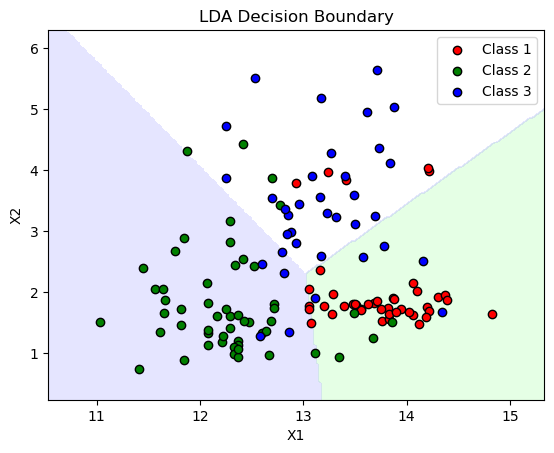

In [102]:
# Your solution here...
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

target = data["Class"]
features = data[["Alcohol", "Malic acid"]]
X = data[["Alcohol", "Malic acid"]].values
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, stratify=target)
LDA_model =LDA()
X_train = X_train.values
LDA_model.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = LDA_model.predict(grid_points)
Z = Z.reshape(xx.shape) #Reshaping, matches the meshgrid now
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # one color per class
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=cmap)
colors = ['r', 'g', 'b']

for k, color in enumerate(colors):
    plt.scatter(X_train[y_train == k+1, 0], X_train[y_train == k+1, 1], c=color, edgecolor='k', label=f'Class {k+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundary')
plt.legend()
plt.show()


In [103]:
x_new = np.array([[13,2.5]])
posteriors = LDA_model.predict_proba(x_new)


y_lda_predict = LDA_model.predict(X_test)
target_names = ["class 1", "class 2", "class 3"]
print(classification_report(y_test, y_lda_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.85      0.73      0.79        15
     class 2       0.71      0.83      0.77        18
     class 3       0.55      0.50      0.52        12

    accuracy                           0.71        45
   macro avg       0.70      0.69      0.69        45
weighted avg       0.71      0.71      0.71        45



/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


## Exercise a2

1) Do you think a QDA model would provide a better fit than the LDA model?

2) Train a QDA classifier and visualize the decision regions on a scatterplot.

3) Compute the model's accuracy and compare it with that of the LDA model.



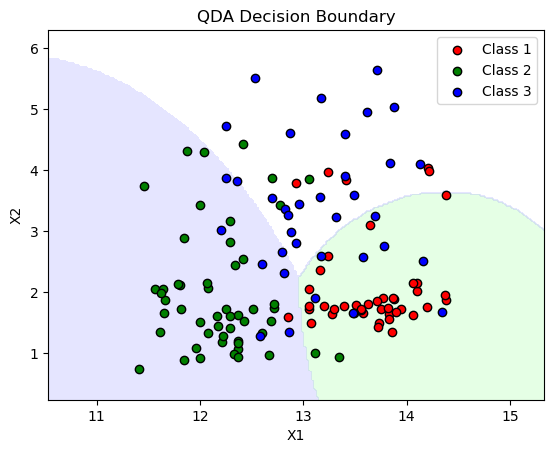

In [106]:
# Your solution here...
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, stratify=target)
QDA_model =QDA()
X_train = X_train.values
QDA_model.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = QDA_model.predict(grid_points)
Z = Z.reshape(xx.shape) #Reshaping, matches the meshgrid now
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # one color per class
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=cmap)
colors = ['r', 'g', 'b']

for k, color in enumerate(colors):
    plt.scatter(X_train[y_train == k+1, 0], X_train[y_train == k+1, 1], c=color, edgecolor='k', label=f'Class {k+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.legend()
plt.show()

In [107]:
y_qda_predict = QDA_model.predict(X_test)
target_names = ["class 1", "class 2", "class 3"]
print(classification_report(y_test, y_qda_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.71      1.00      0.83        15
     class 2       0.82      0.78      0.80        18
     class 3       0.86      0.50      0.63        12

    accuracy                           0.78        45
   macro avg       0.80      0.76      0.75        45
weighted avg       0.80      0.78      0.77        45



/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


## Exercise a3

1) Visualize the class distributions of both of the features. Examine whether the assumptions of LDA and QDA are satisfied or not. How does it affect the model's performance?

2) Work with the features Alcohol and Total Phenols instead. Train again a LDA and QDA model, and plot the respective decision boundaries. Plot the distributions of the features on each class. How is the new model's performance?

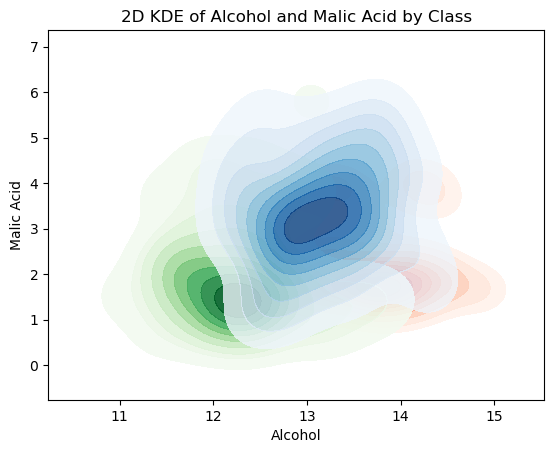

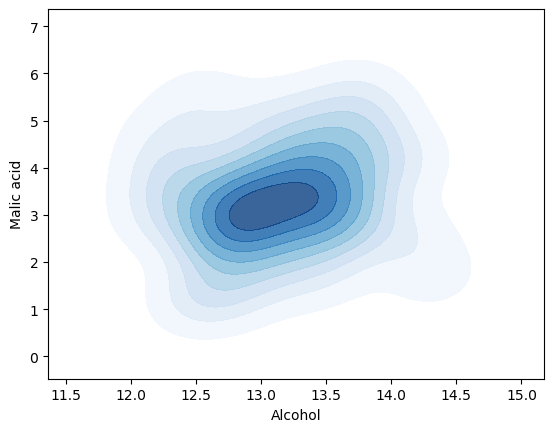

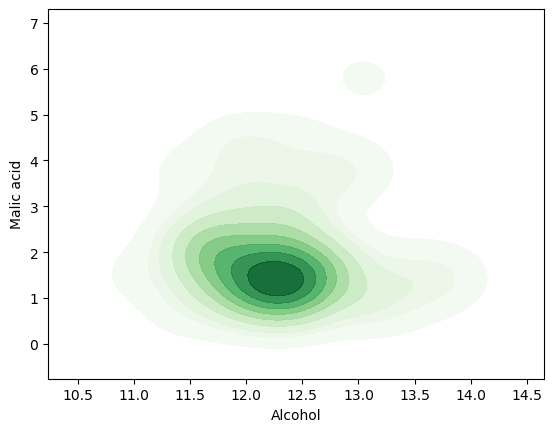

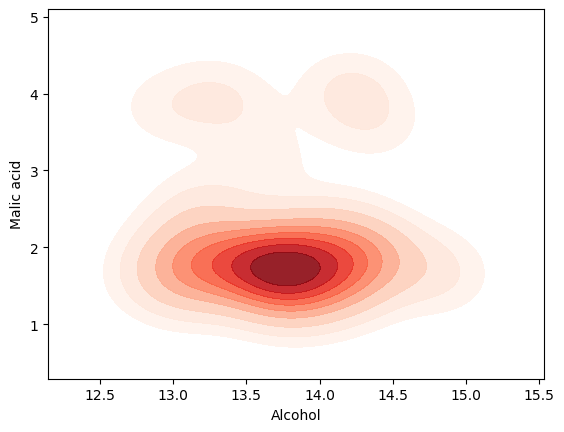

In [115]:
# Your solution here...
import seaborn as sns
colors = ["r","g","y"]
classes = data["Class"].unique()

sns.kdeplot(
    data=data[data['Class']==1], x='Alcohol', y='Malic acid', fill=True, cmap='Reds', alpha=0.9
)
sns.kdeplot(
    data=data[data['Class']==2], x='Alcohol', y='Malic acid', fill=True, cmap='Greens', alpha=0.9
)
sns.kdeplot(
    data=data[data['Class']==3], x='Alcohol', y='Malic acid', fill=True, cmap='Blues', alpha=0.8
)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('2D KDE of Alcohol and Malic Acid by Class')
plt.show()
sns.kdeplot(
    data=data[data['Class']==3], x='Alcohol', y='Malic acid', fill=True, cmap='Blues', alpha=0.8
)
plt.show()
sns.kdeplot(
    data=data[data['Class']==2], x='Alcohol', y='Malic acid', fill=True, cmap='Greens', alpha=0.9
)
plt.show()
sns.kdeplot(
    data=data[data['Class']==1], x='Alcohol', y='Malic acid', fill=True, cmap='Reds', alpha=0.9
)
plt.show()

As seen by the contour plots, they all have different means, but also spread differently. While different means is a good assumption for both LDA and QDA, the way they form in term of variance, it might indicate it suits better for QDA as the covariance might be different.

Thats just from looking at the graph. It would be a good method to look at some hypothesis testing and see if the variances are different enough statistically to say QDA is preferable than LDA

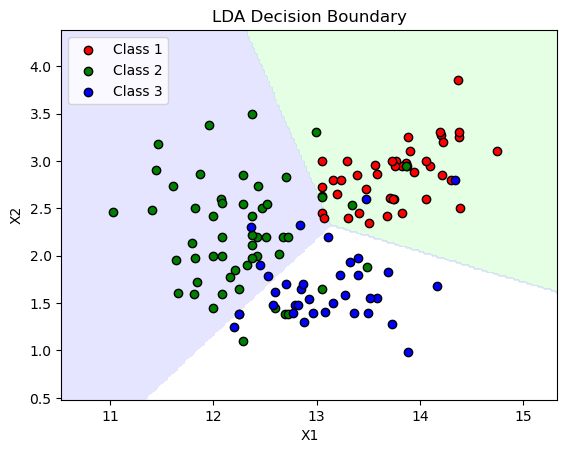

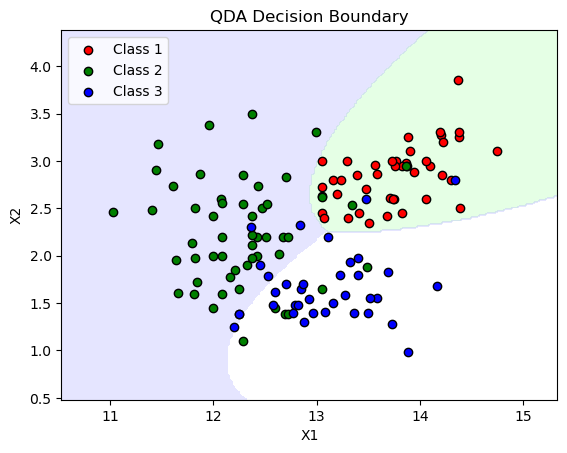

In [119]:
target = data["Class"]
features = data[["Alcohol", "Total phenols"]]
X = data[["Alcohol", "Total phenols"]].values
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=42,stratify=target)
LDA_model =LDA()
X_train = X_train.values
LDA_model.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = LDA_model.predict(grid_points)
Z = Z.reshape(xx.shape) #Reshaping, matches the meshgrid now
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # one color per class
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=cmap)
colors = ['r', 'g', 'b']

for k, color in enumerate(colors):
    plt.scatter(X_train[y_train == k+1, 0], X_train[y_train == k+1, 1], c=color, edgecolor='k', label=f'Class {k+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Decision Boundary')
plt.legend()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=42,stratify=target)
QDA_model =QDA()
X_train = X_train.values
QDA_model.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = QDA_model.predict(grid_points)
Z = Z.reshape(xx.shape) #Reshaping, matches the meshgrid now
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # one color per class
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=cmap)
colors = ['r', 'g', 'b']

for k, color in enumerate(colors):
    plt.scatter(X_train[y_train == k+1, 0], X_train[y_train == k+1, 1], c=color, edgecolor='k', label=f'Class {k+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('QDA Decision Boundary')
plt.legend()
plt.show()

In [125]:
LDA_predict = LDA_model.predict(X_test)
QDA_predict = QDA_model.predict(X_test)
print("LDA:\n",classification_report(y_test, LDA_predict, target_names=target_names))
print("QDA:\n",classification_report(y_test, QDA_predict, target_names=target_names))

LDA:
               precision    recall  f1-score   support

     class 1       0.87      0.87      0.87        15
     class 2       0.82      0.78      0.80        18
     class 3       0.77      0.83      0.80        12

    accuracy                           0.82        45
   macro avg       0.82      0.83      0.82        45
weighted avg       0.82      0.82      0.82        45

QDA:
               precision    recall  f1-score   support

     class 1       0.92      0.80      0.86        15
     class 2       0.82      0.78      0.80        18
     class 3       0.73      0.92      0.81        12

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.82        45
weighted avg       0.83      0.82      0.82        45



/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


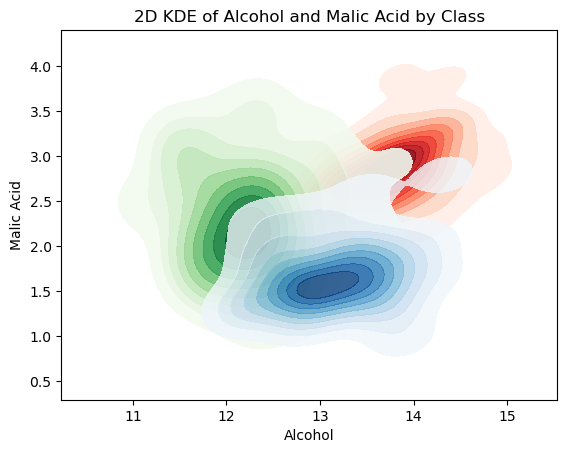

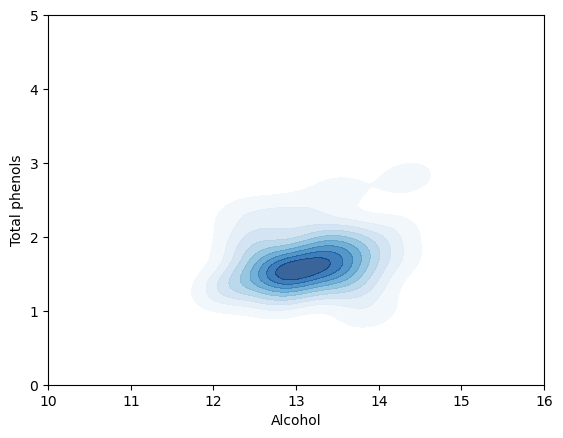

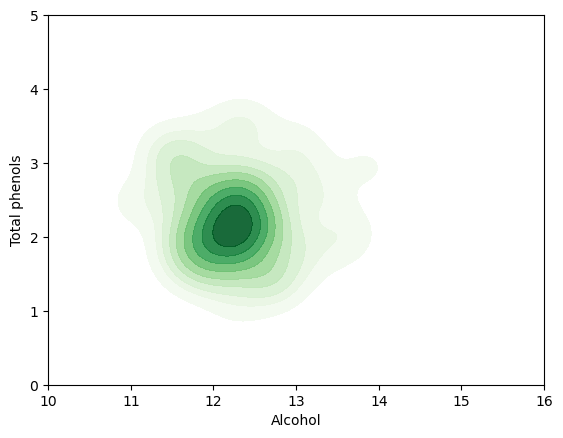

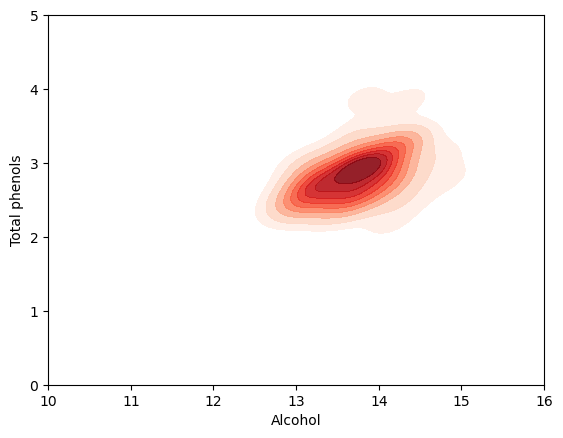

In [127]:
# Your solution here...
import seaborn as sns
y="Total phenols"
colors = ["r","g","y"]
classes = data["Class"].unique()

sns.kdeplot(
    data=data[data['Class']==1], x='Alcohol', y=y, fill=True, cmap='Reds', alpha=0.9
)
sns.kdeplot(
    data=data[data['Class']==2], x='Alcohol', y=y, fill=True, cmap='Greens', alpha=0.9
)
sns.kdeplot(
    data=data[data['Class']==3], x='Alcohol', y=y, fill=True, cmap='Blues', alpha=0.8
)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('2D KDE of Alcohol and Malic Acid by Class')
plt.show()
sns.kdeplot(
    data=data[data['Class']==3], x='Alcohol',y=y, fill=True, cmap='Blues', alpha=0.8
)
plt.xlim(10, 16)
plt.ylim(0.0, 5.0)
plt.show()
sns.kdeplot(
    data=data[data['Class']==2], x='Alcohol', y=y, fill=True, cmap='Greens', alpha=0.9
)
plt.xlim(10, 16)
plt.ylim(0.0, 5.0)
plt.show()

sns.kdeplot(
    data=data[data['Class']==1], x='Alcohol',y=y, fill=True, cmap='Reds', alpha=0.9
)
plt.xlim(10, 16)
plt.ylim(0.0, 5.0)
plt.show()

# <b>Exploring what you learned</b>

## Exercise e1

1) Simulate a dataset with three Gaussian classes:
    - First, use equal class priors (⅓, ⅓, ⅓).
    - Then, use unequal class priors (0.7, 0.2, 0.1).

2) Visualize the decision boundaries in both cases. Reflect on how changing the priors influences the position and shape of the decision boundaries.

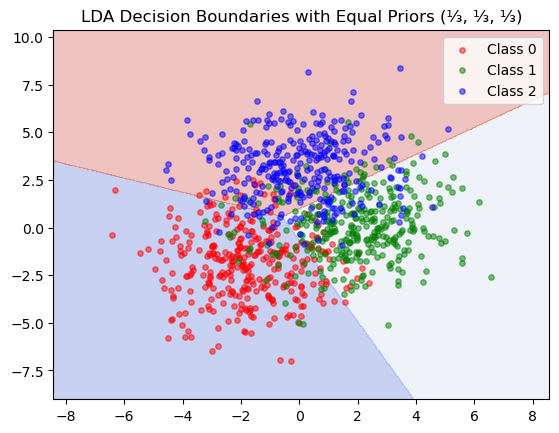

In [10]:
# Your solution here...


""" 
As we increase the priors, we also increase the decision boundary for the class with highest prior. So it gets more area, as more classes
equal to that due to the prior.
"""
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
np.random.seed(42)

n = 1000
priors = [1/3,1/3,1/3]

means = [[-2, -2], [2, 0], [0, 3]]
cov = [[3, 0], [0, 3]]
labels = np.random.choice([0,1,2],size=n,p=priors)

X = np.zeros((n,2))
for k in range(3):
    X[labels == k] = np.random.multivariate_normal(means[k], cov, np.sum(labels == k))
clf = LDA()
clf.fit(X,labels)

x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

# Predict on grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
colors = ["red", "green", "blue"]
for k, color in enumerate(colors):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], 
                label=f"Class {k}", alpha=0.5, s=15, color=color)

plt.legend()
plt.title("LDA Decision Boundaries with Equal Priors (⅓, ⅓, ⅓)")
plt.show()


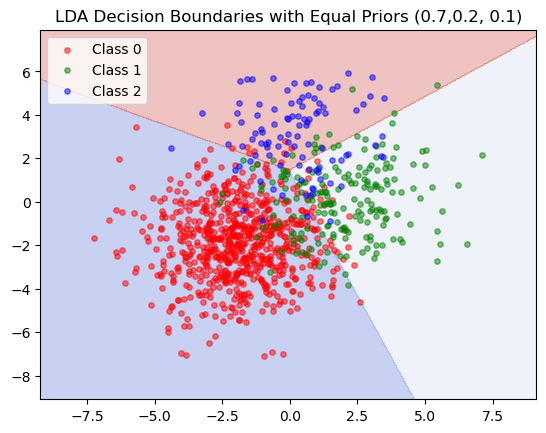

In [72]:
# Your solution here...
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
np.random.seed(42)

n = 1000
priors = [0.7,0.2,0.1]

means = [[-2, -2], [2, 0], [0, 3]]
cov = [[3, 0], [0, 3]]
labels = np.random.choice([0,1,2],size=n,p=priors)

X = np.zeros((n,2))
for k in range(3):
    X[labels == k] = np.random.multivariate_normal(means[k], cov, np.sum(labels == k))
clf = LDA()
clf.fit(X,labels)

x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

# Predict on grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
colors = ["red", "green", "blue"]
for k, color in enumerate(colors):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], 
                label=f"Class {k}", alpha=0.5, s=15, color=color)

plt.legend()
plt.title("LDA Decision Boundaries with Equal Priors (0.7,0.2, 0.1)")
plt.show()
""" 
As expected the class(blue area) increases because  the prior is higher.
"""

## Exercise e2

Simulate three two-dimensional Gaussian cases, each of them having three different classes distributed as follows:

Case 1:
$$
Class_1 \sim \mathcal{N}\Bigg(\begin{bmatrix}-2 \\ 0\end{bmatrix}, 
\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\Bigg), \quad
Class_2 \sim \mathcal{N}\Bigg(\begin{bmatrix}0 \\ 3\end{bmatrix}, 
\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\Bigg), \quad
Class_3 \sim \mathcal{N}\Bigg(\begin{bmatrix}2 \\ -2\end{bmatrix}, 
\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\Bigg)
$$

Case 2:
$$
Class_1 \sim \mathcal{N}\Bigg(\begin{bmatrix}-2 \\ 0\end{bmatrix}, 
\begin{bmatrix}1.5 & 0 \\ 0 & 1.5\end{bmatrix}\Bigg), \quad
Class_2 \sim \mathcal{N}\Bigg(\begin{bmatrix}0 \\ 3\end{bmatrix}, 
\begin{bmatrix}0.5 & 0 \\ 0 & 0.5\end{bmatrix}\Bigg), \quad
Class_3 \sim \mathcal{N}\Bigg(\begin{bmatrix}2 \\ -2\end{bmatrix}, 
\begin{bmatrix}2.0 & 0 \\ 0 & 0.8\end{bmatrix}\Bigg)
$$

Case 3:
$$
Class_1 \sim \mathcal{N}\Bigg(\begin{bmatrix}-2 \\ 0\end{bmatrix}, 
\begin{bmatrix}1.5 & 0.98 \\ 0.98 & 1.0\end{bmatrix}\Bigg), \quad
Class_2 \sim \mathcal{N}\Bigg(\begin{bmatrix}0 \\ 3\end{bmatrix}, 
\begin{bmatrix}0.5 & -0.48 \\ -0.48 & 0.8\end{bmatrix}\Bigg), \quad
Class_3 \sim \mathcal{N}\Bigg(\begin{bmatrix}2 \\ -2\end{bmatrix}, 
\begin{bmatrix}1.2 & 1.14 \\ 1.14 & 1.5\end{bmatrix}\Bigg)
$$

1) Generate the data and inspect the scatterplot. Based on the distribution, which model do you expect to perform best in each case: LDA, QDA, Naive Bayes, or Logistic Regression?

2) Train the four models mentioned above and plot their decision boundaries.

3) Compute the test misclassification rates for each case and compare them. Do the results match your expectations?


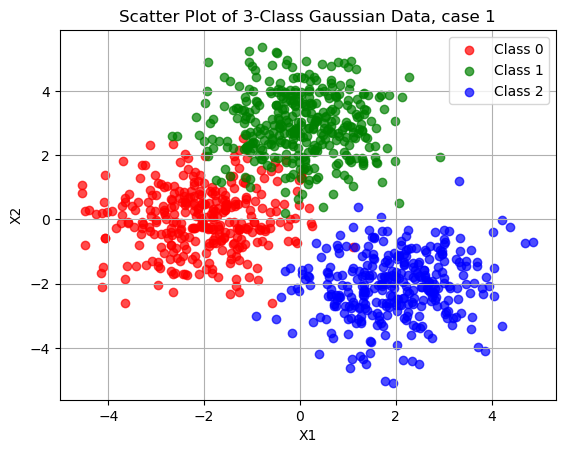

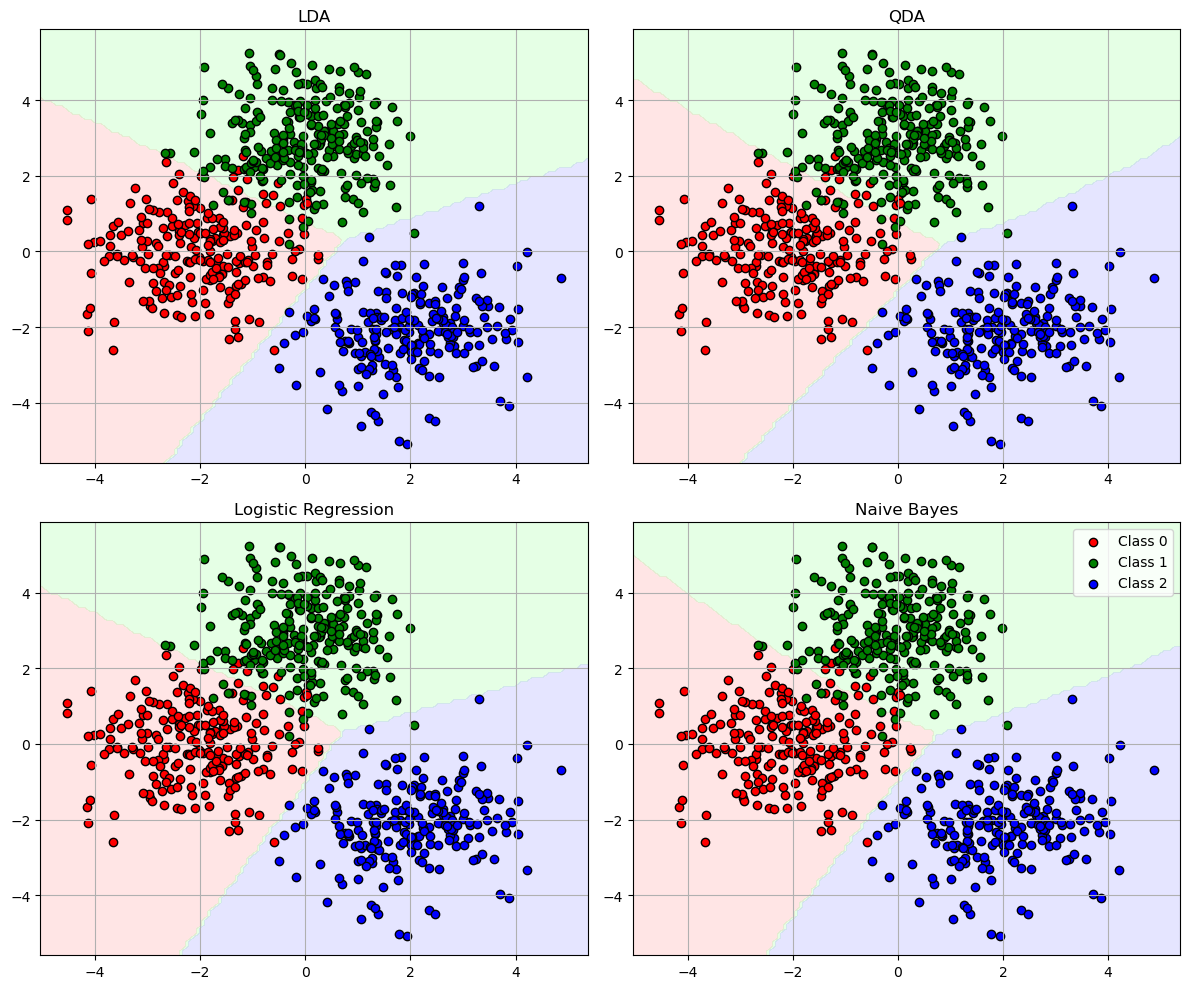

({'LDA': 0.98, 'QDA': 0.98, 'Logistic Regression': 0.98, 'Naive Bayes': 0.98},
 {'LDA': 0.020000000000000018,
  'QDA': 0.020000000000000018,
  'Logistic Regression': 0.020000000000000018,
  'Naive Bayes': 0.020000000000000018})

In [68]:
# Your solution here...
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
""" Case 1 """
classes = 3
means = [[-2,0],[0,3],[2,-2]]
cov1 = np.array([[1,0],[0,1]])

def generate_gaussian(mean, sigmas, n=0):
    classes = len(means)
    if isinstance(sigmas, np.ndarray):
        sigmas = [sigmas] * classes
    labels = np.random.choice(classes, n)
    X = np.zeros((n,2))
    for k in range(classes):
        X[labels == k] = np.random.multivariate_normal(mean[k], sigmas[k], np.sum(labels == k))
    return X, labels

X, labels = generate_gaussian(means,cov1,n=1000)



priors = np.array([np.sum(labels == k) for k in range(classes)]) / n
colors = ['r', 'g', 'b']
for k in range(classes):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], label=f'Class {k}', alpha=0.7, color=colors[k])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of 3-Class Gaussian Data, case 1')
plt.legend()
plt.grid(True)
plt.show()


""" Testing"""

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

models = {
    "LDA": LDA(),
    "QDA": QDA(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)


xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
colors = ['r', 'g', 'b']
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
for i, (name, model) in enumerate(models.items()):
    Z = model.predict(x_in)
    
    Z = Z.reshape(xx.shape)
    
    ax = axes[i]
    ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, cmap=cmap)
    
    # Plot training points
    for k, color in enumerate(colors):
        ax.scatter(X_train[y_train == k, 0], X_train[y_train == k, 1], c=color, label=f'Class {k}', edgecolor='k')
    
    ax.set_title(name)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

plt.legend()
plt.tight_layout()
plt.show()
miss_class = {}
accuracy = {}
for name, model in models.items():
    accuracy[name] = accuracy_score(y_test, model.predict(X_test))
    miss_class[name] = 1-accuracy_score(y_test, model.predict(X_test))

accuracy, miss_class

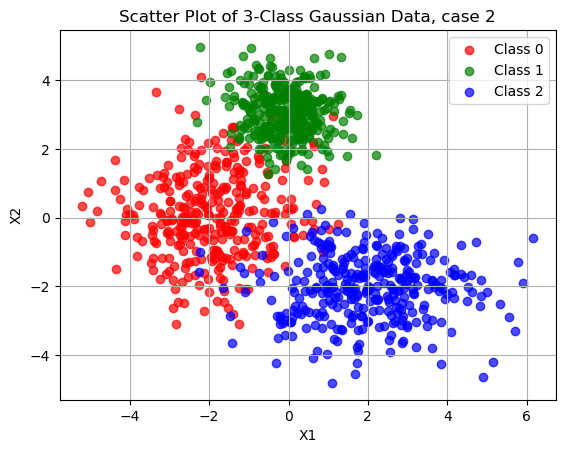

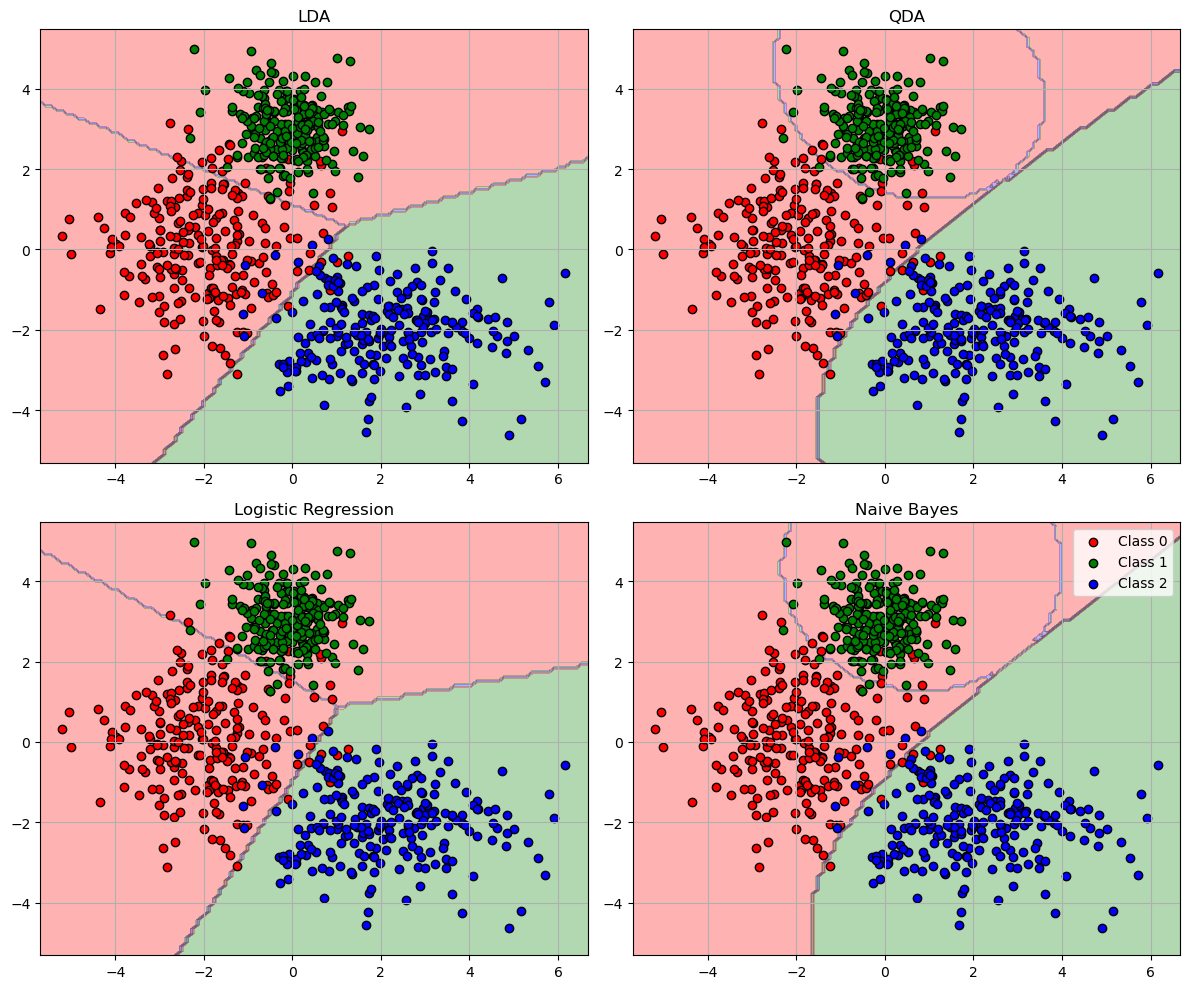

({'LDA': 0.9333333333333333,
  'QDA': 0.95,
  'Logistic Regression': 0.95,
  'Naive Bayes': 0.95},
 {'LDA': 0.06666666666666665,
  'QDA': 0.050000000000000044,
  'Logistic Regression': 0.050000000000000044,
  'Naive Bayes': 0.050000000000000044})

In [69]:
means = [[-2,0],[0,3],[2,-2]]
cov2 = [
    np.array([[1.5, 0], [0, 1.5]]),
    np.array([[0.5, 0], [0, 0.5]]),
    np.array([[2.0, 0], [0, 0.8]])
]
X, labels = generate_gaussian(means,cov2,n=1000)
priors = np.array([np.sum(labels == k) for k in range(classes)]) / n
colors = ['r', 'g', 'b']
for k in range(classes):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], label=f'Class {k}', alpha=0.7, color=colors[k])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of 3-Class Gaussian Data, case 2')
plt.legend()
plt.grid(True)
plt.show()


""" Testing"""

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

models = {
    "LDA": LDA(),
    "QDA": QDA(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)


xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
colors = ['r', 'g', 'b']

for i, (name, model) in enumerate(models.items()):
    Z = model.predict(x_in)
    
    Z = Z.reshape(xx.shape)
    
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, colors=colors)
    
    # Plot training points
    for k, color in enumerate(colors):
        ax.scatter(X_train[y_train == k, 0], X_train[y_train == k, 1], c=color, label=f'Class {k}', edgecolor='k')
    
    ax.set_title(name)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

plt.legend()
plt.tight_layout()
plt.show()
miss_class = {}
accuracy = {}
for name, model in models.items():
    accuracy[name] = accuracy_score(y_test, model.predict(X_test))
    miss_class[name] = 1-accuracy_score(y_test, model.predict(X_test))

accuracy, miss_class

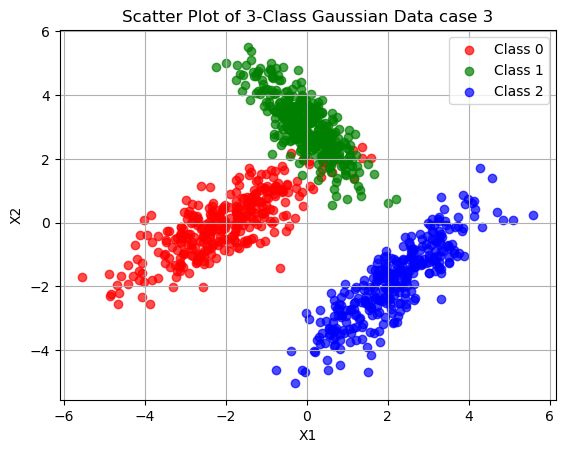

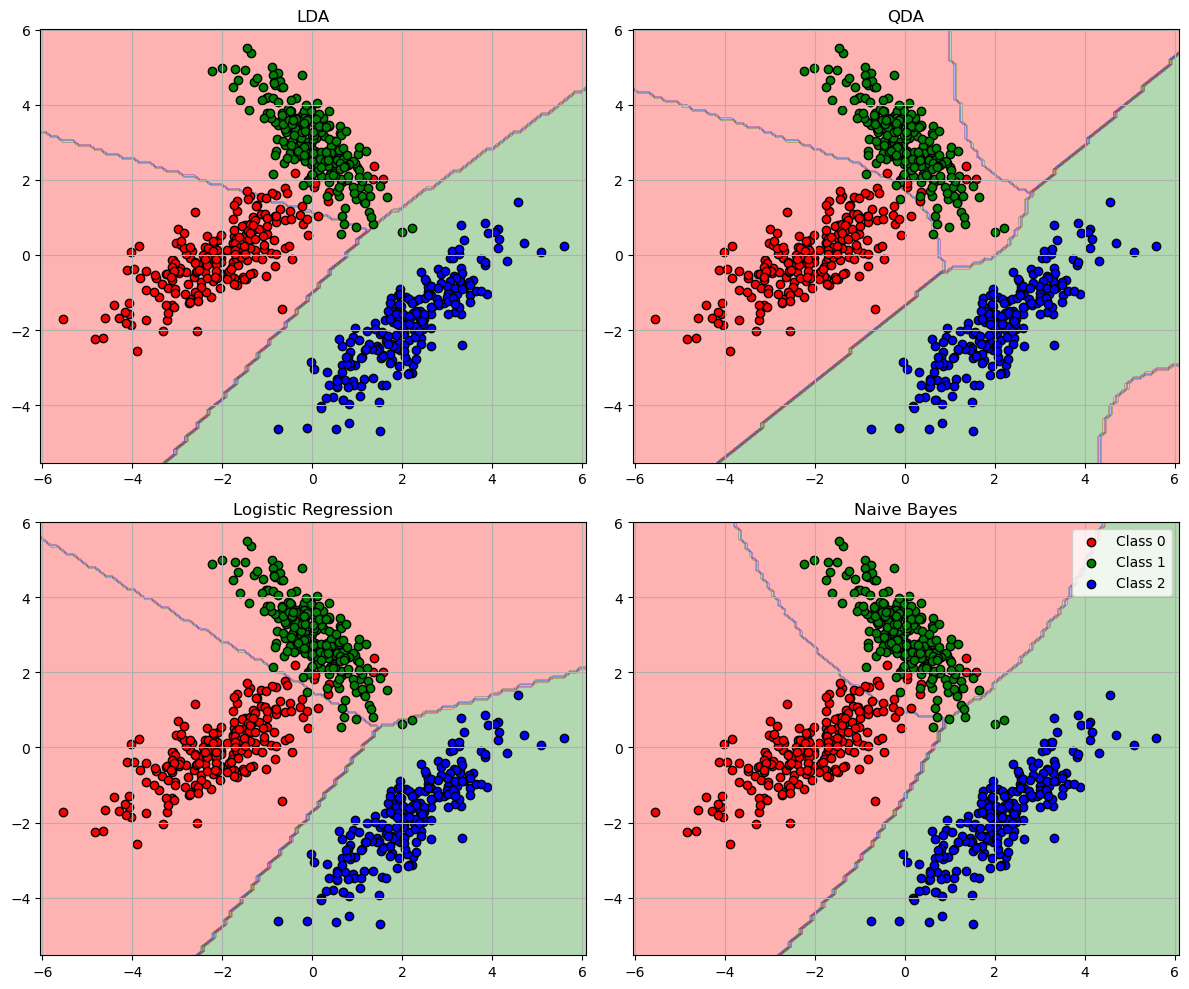

({'LDA': 0.9833333333333333,
  'QDA': 0.9833333333333333,
  'Logistic Regression': 0.9833333333333333,
  'Naive Bayes': 0.9833333333333333},
 {'LDA': 0.01666666666666672,
  'QDA': 0.01666666666666672,
  'Logistic Regression': 0.01666666666666672,
  'Naive Bayes': 0.01666666666666672})

In [70]:
means = [[-2,0],[0,3],[2,-2]]
cov2 = [
    np.array([[1.5, 0.98], [0.98, 1.0]]),
    np.array([[0.5, -0.48], [-0.48, 0.8]]),
    np.array([[1.2, 1.14], [1.14, 1.5]])
]
X, labels = generate_gaussian(means,cov2,n=1000)

colors = ['r', 'g', 'b']
for k in range(classes):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], label=f'Class {k}', alpha=0.7, color=colors[k])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of 3-Class Gaussian Data case 3')
plt.legend()
plt.grid(True)
plt.show()

""" Testing"""

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

models = {
    "LDA": LDA(),
    "QDA": QDA(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)


xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
colors = ['r', 'g', 'b']

for i, (name, model) in enumerate(models.items()):
    Z = model.predict(x_in)
    
    Z = Z.reshape(xx.shape)
    
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, colors=colors)
    
    # Plot training points
    for k, color in enumerate(colors):
        ax.scatter(X_train[y_train == k, 0], X_train[y_train == k, 1], c=color, label=f'Class {k}', edgecolor='k')
    
    ax.set_title(name)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

plt.legend()
plt.tight_layout()
plt.show()
miss_class = {}
accuracy = {}
for name, model in models.items():
    accuracy[name] = accuracy_score(y_test, model.predict(X_test))
    miss_class[name] = 1-accuracy_score(y_test, model.predict(X_test))

accuracy, miss_class

In [52]:
""" Testing"""
